<a href="https://colab.research.google.com/github/richirey75/Data-Mining-CS4990/blob/prerna/DataMiningProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mounting my drive

In [1]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


## To make shell commands we need the "!" before the command

In [2]:
!python --version

Python 3.10.12


- The % is a special command in Google Colab and Jupyter notebooks called a "magic command". These commands provide special functionalities.

- %cd is one such magic command which is used to change the current working directory.

In [3]:
%cd /content/drive/MyDrive/CS4990GroupProject/CSV_files
!pwd

/content/drive/.shortcut-targets-by-id/1hLEMmjmhbJwf5855ZTdx4nTzxGUxkruH/CS4990GroupProject/CSV_files
/content/drive/.shortcut-targets-by-id/1hLEMmjmhbJwf5855ZTdx4nTzxGUxkruH/CS4990GroupProject/CSV_files


## USEFUL SHORTSCUTS

- Ctrl + M + H: Show all shortcuts
- Ctrl + M + B: Create a new cell below
- Ctrl + M + A: Create a new cell above
- Ctrl + M + D: Delete the current cell
- Ctrl + M + Y: Change cell to code
- Ctrl + M + M: Change cell to text
- Ctrl + Enter: Run the current cell
- Ctrl + Shift + Enter: Run the current cell and select the below cell

## Installation of Library
- We will using this library
  - [spotify library](https://spotipy.readthedocs.io/en/2.24.0/)


In [4]:
!pip install spotipy --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.3/261.3 kB 4.1 MB/s eta 0:00:00


## We need to import our libraries we will be using for the project
  - spotipy
  - pandas
  - numpy

In [5]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import pandas as pd
import numpy as np

## This is how we will identify to the API
- We need to first get a key from [spotify dev](https://developer.spotify.com/)
- Will get two keys
  - Client Id key
  - Client Secret key

- Follow by inputting our keys and autheticating

In [24]:
client_id = input("Enter your client_id: ")
client_secret = input("Enter your client_secret: ")

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Enter your client_id: 6d4509ec5a8f4fa5b0740a2c588177dc
Enter your client_secret: 68f5542ea4454babb816a0d930e1c2ce


## Search function to query an artist
- As an example we the band call "the cramberries"
- This is just as if you were searching for an artists in the spotify environnement
- We get the artist ID

In [25]:
results = sp.search(q='The Cranberries', limit=1, type='artist')
artist_id = results['artists']['items'][0]['id']
artist_id

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'7t0rwkOPGlDPEhaOcVtOt9'

## Here is how to retreve albums from the artist_id from above
- We will use the artist ID to retrieve the albums from the artist page

In [26]:
albums = sp.artist_albums(artist_id, album_type='album')

album_names = [album['name'] for album in albums['items']]

album_names

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/spotipy/client.py:424: DeprecationWarning: You're using `artist_albums(..., album_type='...')` which will be removed in future versions. Please adjust your code accordingly by using `artist_albums(..., include_groups='...')` instead.
  warnings.warn(


['To The Faithful Departed (Deluxe Edition)',
 'Remembering Dolores',
 'No Need To Argue (Remastered 2020)',
 'No Need To Argue (Deluxe)',
 'In the End',
 'Something Else',
 'Live At the Hammersmith Apollo, London 2012',
 'Roses',
 'Live 2010 - Zenith Paris, 22.03.10',
 'Bualadh Bos: The Cranberries Live',
 'Wake Up And Smell The Coffee',
 'Bury The Hatchet (The Complete Sessions 1998-1999)',
 'Bury The Hatchet',
 'To The Faithful Departed (The Complete Sessions 1996-1997)',
 'To The Faithful Departed',
 'No Need To Argue (The Complete Sessions 1994-1995)',
 "Everybody Else Is Doing It, So Why Can't We? (The Complete Sessions 1991-1993)",
 "Everybody Else Is Doing It, So Why Can't We? (Super Deluxe)",
 "Everybody Else Is Doing It, So Why Can't We?"]

## We can extract the songs from an album
- Here the code gives back the album songs from the 18 position on the list above

In [27]:
tracks = sp.album_tracks(albums['items'][18]['id'])
track_names = [track['name'] for track in tracks['items']]

track_names

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['I Still Do',
 'Dreams',
 'Sunday',
 'Pretty',
 'Waltzing Back',
 'Not Sorry',
 'Linger',
 'Wanted',
 "Still Can't...",
 'I Will Always',
 'How',
 'Put Me Down']

## Using Pandas to organize
- We can use pandas to oprganize our data into a CSV file

In [ ]:
df = pd.DataFrame({'Track Names': track_names})
df.to_csv('track_names.csv', index=False)
df

,Track Names
0,I Still Do
1,Dreams
2,Sunday
3,Pretty
4,Waltzing Back
5,Not Sorry
6,Linger
7,Wanted
8,Still Can't...
9,I Will Always


## We enter the file that we want to save the svc files to

In [28]:
%cd /content/drive/MyDrive/CS4990GroupProject/CSV_files
!pwd

/content/drive/.shortcut-targets-by-id/1hLEMmjmhbJwf5855ZTdx4nTzxGUxkruH/CS4990GroupProject/CSV_files
/content/drive/.shortcut-targets-by-id/1hLEMmjmhbJwf5855ZTdx4nTzxGUxkruH/CS4990GroupProject/CSV_files


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Now we use all the tools we learn above to queary an artist and retrieve all their information
- We query the artist
- Scrape their information
- Scrape their albums
- Scrape each song in their discography
- Use panda to save them in CSV files
- Lastly we save them in our drive

In [31]:
# Artist information
artist_name = input("Enter an artist name: ")
result = sp.search(q=artist_name, limit=1, type='artist')
artist = result['artists']['items'][0]

artist_info = {
    'name': artist['name'],
    'id': artist['id'],
    'popularity': artist['popularity'],
    'genres': artist['genres'],
    'followers': artist['followers']['total']
}

# Album and track information with audio features
albums = sp.artist_albums(artist['id'], album_type='album')
all_tracks = []

for album in albums['items']:
    album_info = {
        'album_name': album['name'],
        'album_id': album['id'],
        'release_date': album['release_date'],
        'total_tracks': album['total_tracks']
    }

    tracks = sp.album_tracks(album['id'])
    for track in tracks['items']:
        track_info = {
            'track_name': track['name'],
            'track_id': track['id'],
            'duration_min': track['duration_ms'] / 60000
        }
        try:
            track_info['popularity'] = track['popularity']
        except KeyError:
            track_info['popularity'] = None

        # Get audio features
        audio_features = sp.audio_features(track['id'])[0]
        if audio_features:
            track_info.update(audio_features)

        all_tracks.append({**album_info, **track_info})

# Create DataFrames
artist_df = pd.DataFrame([artist_info])
tracks_df = pd.DataFrame(all_tracks)

# Save to CSV
artist_df.to_csv(f'{artist_name}_artist_info.csv', index=False)
tracks_df.to_csv(f'{artist_name}_tracks_info.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Enter an artist name: KK


/usr/local/lib/python3.10/dist-packages/spotipy/client.py:424: DeprecationWarning: You're using `artist_albums(..., album_type='...')` which will be removed in future versions. Please adjust your code accordingly by using `artist_albums(..., include_groups='...')` instead.
  warnings.warn(


In [23]:
df1 = pd.read_csv('Backstreet Boys_tracks_info.csv')
df2 = pd.read_csv('*NSYNC_tracks_info.csv')

combined_df = pd.concat([df1, df2]) # add more DataFrames to the list if needed
combined_df.to_csv('combined_tracks_info_Backstreet_NSYNC.csv', index=False)

combined_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Here is to concatenate the CSV files

# Identify which features have the strongest relationship with 'danceability'

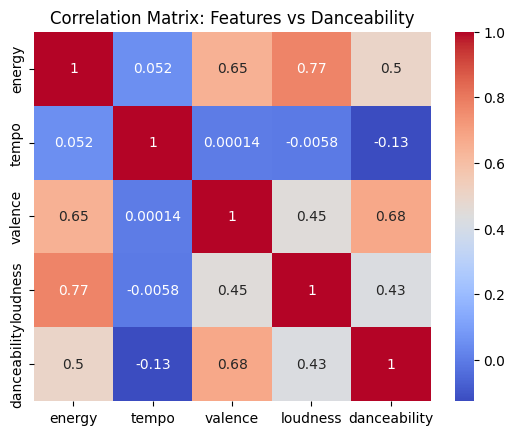

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# calculate correlations only for the features against danceability
feature_columns = ['energy', 'tempo', 'valence', 'loudness']  # list of features
df_corr = combined_df[feature_columns + ['danceability']].corr()

# Plot the heatmap to see the correlations
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Features vs Danceability')
plt.show()

# Visualize the Data - Scatter Plots Based on Their Danceability

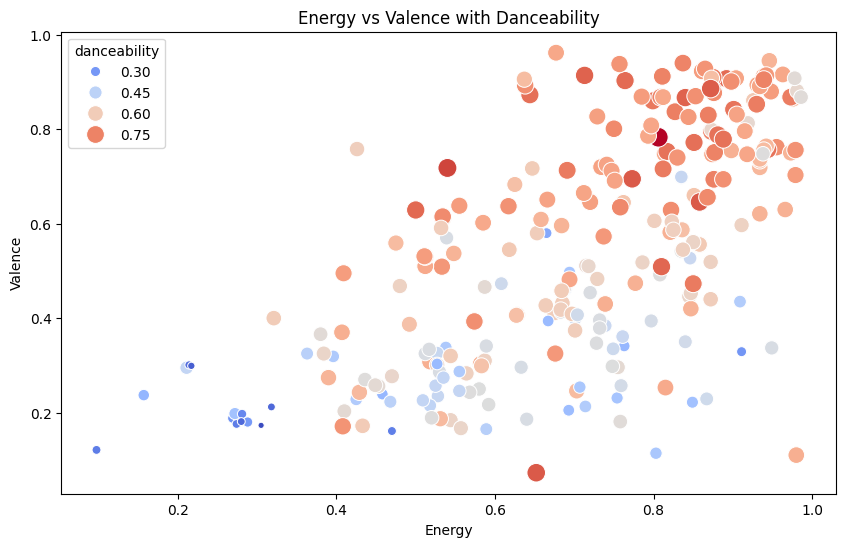

In [ ]:
# scatter plot with danceability as color (gradient if danceability is continuous)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_df, x='energy', y='valence', hue='danceability', palette='coolwarm', size='danceability', sizes=(20, 200))
plt.title('Energy vs Valence with Danceability')
plt.xlabel('Energy')
plt.ylabel('Valence')
plt.show()

# Pairplot - Visualize relationship between multiple features in a dataset

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

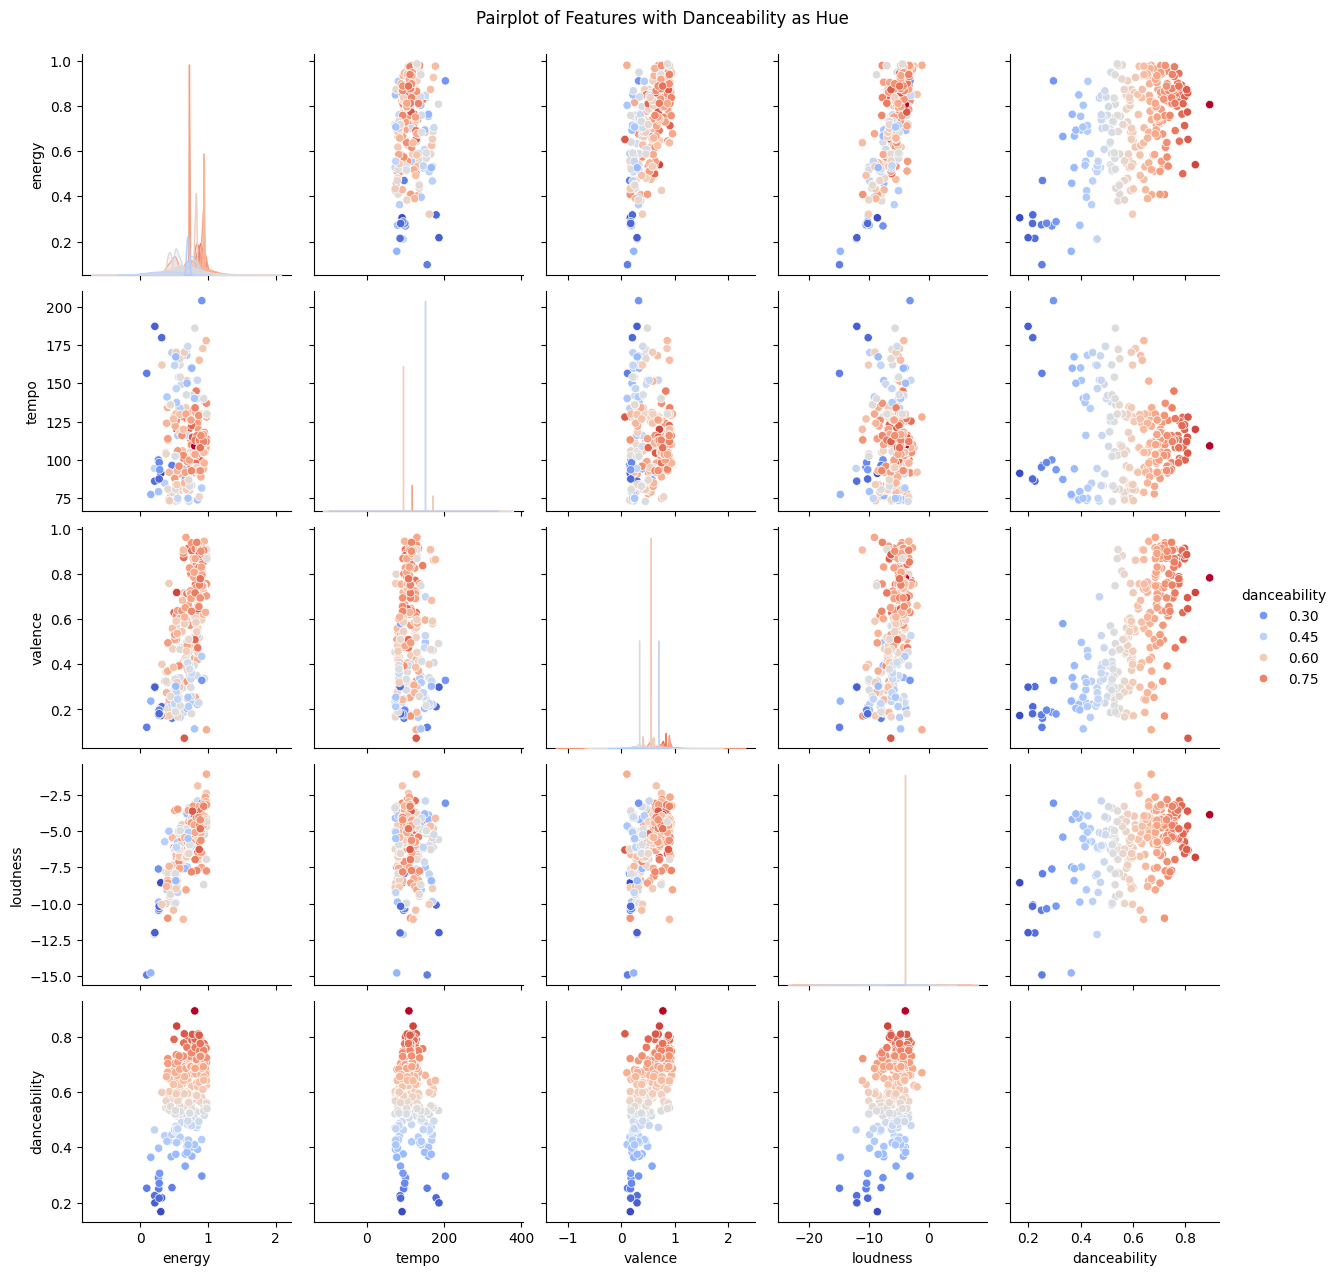

In [ ]:
sns.pairplot(combined_df, vars=['energy', 'tempo', 'valence', 'loudness', 'danceability'],
             hue='danceability', palette='coolwarm', markers='o', diag_kind='kde')

plt.suptitle('Pairplot of Features with Danceability as Hue', y=1.02)
plt.show()

#Frequent Pattern Analysis

In [34]:
# df1 = pd.read_csv('Oasis_tracks_info.csv')
# df2 = pd.read_csv('cranberries_tracks_info.csv')

df1 = pd.read_csv('Arijit Singh_tracks_info.csv')
df2 = pd.read_csv('KK_tracks_info.csv')

combined_dfForFPA = pd.concat([df1, df2]) # add more DataFrames to the list if needed
combined_dfForFPA.to_csv('combined_tracks_info_ArijitSingh_KK.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
combined_dfForFPA.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,album_name,album_id,release_date,total_tracks,track_name,track_id,duration_min,popularity,danceability,energy,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Arijit Singh Top Sad Love Hits,0os2iPNHyo2yBFi4A8RKXB,2024-04-26,17,"Shayad (From ""Love Aaj Kal"")",5ieAPqywBwvlpOXyfj6H2E,4.132350,NaN,0.486,0.456,...,0.1410,0.346,136.085,audio_features,5ieAPqywBwvlpOXyfj6H2E,spotify:track:5ieAPqywBwvlpOXyfj6H2E,https://api.spotify.com/v1/tracks/5ieAPqywBwvl...,https://api.spotify.com/v1/audio-analysis/5ieA...,247941,4
1,Arijit Singh Top Sad Love Hits,0os2iPNHyo2yBFi4A8RKXB,2024-04-26,17,"Hamari Adhuri Kahani (Title Track) [From ""Hama...",1KDJ3fkr07ZE11X8ceC40u,6.646650,NaN,0.299,0.359,...,0.1320,0.205,103.842,audio_features,1KDJ3fkr07ZE11X8ceC40u,spotify:track:1KDJ3fkr07ZE11X8ceC40u,https://api.spotify.com/v1/tracks/1KDJ3fkr07ZE...,https://api.spotify.com/v1/audio-analysis/1KDJ...,398799,3
2,Arijit Singh Top Sad Love Hits,0os2iPNHyo2yBFi4A8RKXB,2024-04-26,17,"Channa Mereya (From ""Ae Dil Hai Mushkil"")",3PrxpfaQPZfTGVnJEUHoNu,4.822217,NaN,0.474,0.786,...,0.1060,0.735,90.127,audio_features,3PrxpfaQPZfTGVnJEUHoNu,spotify:track:3PrxpfaQPZfTGVnJEUHoNu,https://api.spotify.com/v1/tracks/3PrxpfaQPZfT...,https://api.spotify.com/v1/audio-analysis/3Prx...,289333,4
3,Arijit Singh Top Sad Love Hits,0os2iPNHyo2yBFi4A8RKXB,2024-04-26,17,"Pal (From ""Jalebi"")",4oCCEE3wFWydKb2LhBsyHn,4.121433,NaN,0.511,0.501,...,0.0708,0.324,133.878,audio_features,4oCCEE3wFWydKb2LhBsyHn,spotify:track:4oCCEE3wFWydKb2LhBsyHn,https://api.spotify.com/v1/tracks/4oCCEE3wFWyd...,https://api.spotify.com/v1/audio-analysis/4oCC...,247286,4
4,Arijit Singh Top Sad Love Hits,0os2iPNHyo2yBFi4A8RKXB,2024-04-26,17,"Ae Dil Hai Mushkil Title Track (From ""Ae Dil H...",0qwjvxGsEIdnFDCtICCH40,4.483867,NaN,0.517,0.654,...,0.1650,0.368,123.968,audio_features,0qwjvxGsEIdnFDCtICCH40,spotify:track:0qwjvxGsEIdnFDCtICCH40,https://api.spotify.com/v1/tracks/0qwjvxGsEIdn...,https://api.spotify.com/v1/audio-analysis/0qwj...,269032,4


In [36]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

# Load the Spotify dataset (assuming 'energy', 'valence', and 'danceability' columns exist)
spotify_data = combined_dfForFPA

# 1. Discretize 'energy', 'valence', and 'danceability' into 'Low', 'Medium', 'High'
# This categorizes each feature into 3 bins: low, medium, and high
def categorize_feature(feature_column, num_bins=3):
    categories = ['Low', 'Medium', 'High']
    return pd.cut(feature_column, bins=num_bins, labels=categories)

# Apply the discretization function to the relevant features
spotify_data['energy_category'] = categorize_feature(spotify_data['energy'])
spotify_data['valence_category'] = categorize_feature(spotify_data['valence'])
spotify_data['danceability_category'] = categorize_feature(spotify_data['danceability'])

# 2. Convert the categorized features into one-hot encoded DataFrame
# This is necessary for the Apriori algorithm
one_hot_encoded_data = pd.get_dummies(spotify_data[['energy_category', 'valence_category', 'danceability_category']])

# 3. Apply the Apriori algorithm to discover frequent itemsets
# min_support defines the minimum threshold for an itemset to be considered frequent
frequent_itemsets = apriori(one_hot_encoded_data, min_support=0.1, use_colnames=True)

# 4. Generate association rules from the discovered frequent itemsets
# min_threshold sets the minimum confidence level for the rules
association_rules_df = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# 5. Sort the rules by 'lift' to find the most interesting or impactful ones
sorted_rules = association_rules_df.sort_values(by='lift', ascending=False)

# 6. Display the most relevant columns of the association rules DataFrame
print(sorted_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


                                          antecedents  \
18  (energy_category_High, danceability_category_H...   
4                             (valence_category_High)   
9                             (valence_category_High)   
19  (valence_category_High, danceability_category_...   
17      (energy_category_High, valence_category_High)   
11  (danceability_category_Medium, valence_categor...   
16    (energy_category_High, valence_category_Medium)   
0                              (valence_category_Low)   
15  (danceability_category_Medium, energy_category...   
7                      (danceability_category_Medium)   
8                           (valence_category_Medium)   
13  (energy_category_Medium, danceability_category...   
10     (energy_category_Medium, valence_category_Low)   
1                           (valence_category_Medium)   
6                              (valence_category_Low)   
12  (energy_category_Medium, valence_category_Medium)   
3                      (danceab

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


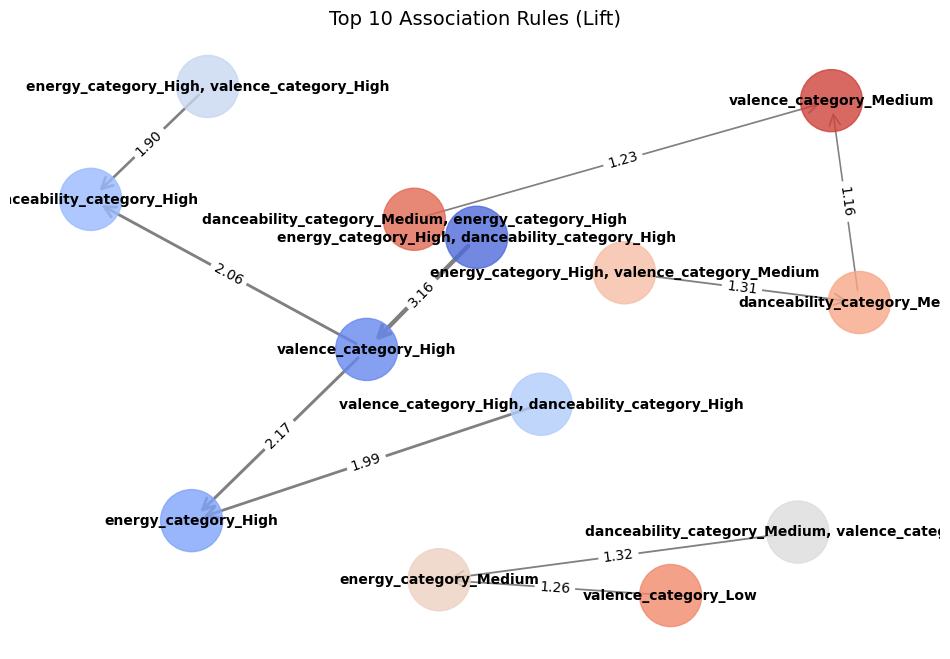

In [37]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# Filter rules for the top 10 based on lift to make the graph less cluttered
top_rules = sorted_rules.sort_values(by='lift', ascending=False).head(10)

# Create a directed graph
G = nx.DiGraph()

# Add edges with antecedents as start node and consequents as end node
for i, rule in top_rules.iterrows():
    G.add_edge(', '.join(list(rule['antecedents'])),
               ', '.join(list(rule['consequents'])),
               weight=rule['lift'])

# Set up the layout for nodes (spring layout for nicer arrangement)
pos = nx.spring_layout(G, k=1, seed=42)

# Draw the nodes
plt.figure(figsize=(12, 8))
node_color = sns.color_palette("coolwarm", len(G))  # Color palette for nodes
nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=2000, alpha=0.8)

# Draw the edges (with width representing 'lift')
edges = nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20,
                               edge_color='grey', width=[G[u][v]['weight'] for u,v in G.edges])

# Draw labels for nodes
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold', font_color='black')

# Add edge labels (showing the lift of each rule)
edge_labels = {(u, v): f"{G[u][v]['weight']:.2f}" for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Title and visual adjustments
plt.title('Top 10 Association Rules (Lift)', fontsize=14)
plt.axis('off')  # Turn off the axis
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


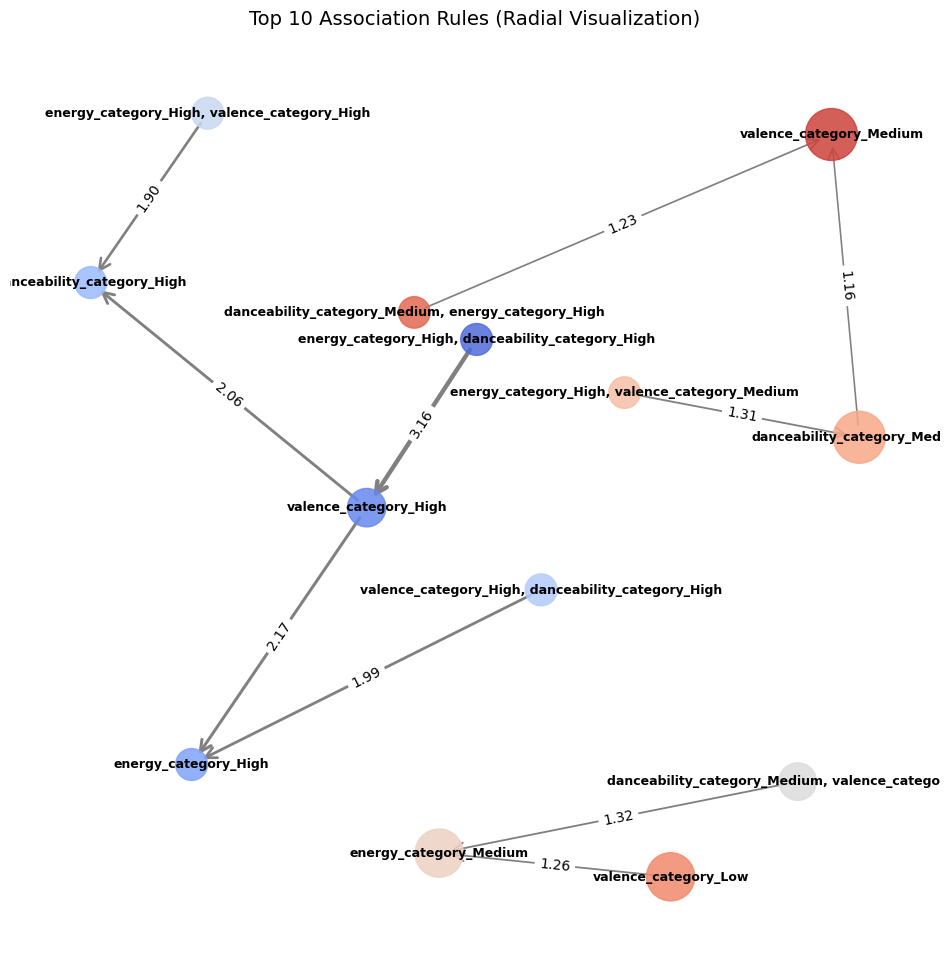

In [38]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# Filter rules for the top 10 based on lift (you can adjust this)
top_rules = sorted_rules.sort_values(by='lift', ascending=False).head(10)

# Create a directed graph
G = nx.DiGraph()

# Add edges with antecedents as start node and consequents as end node
for i, rule in top_rules.iterrows():
    G.add_edge(', '.join(list(rule['antecedents'])),
               ', '.join(list(rule['consequents'])),
               weight=rule['lift'])

# Radial layout (circular node positioning)
pos = nx.spring_layout(G, k=1, seed=42)

# Calculate node sizes based on support, but ensure they match the number of nodes
# Get a list of all nodes in the graph
all_nodes = list(G.nodes())

# Create a dictionary mapping node names to their sizes
node_sizes = {}
for _, rule in top_rules.iterrows():
    antecedent = ', '.join(list(rule['antecedents']))
    consequent = ', '.join(list(rule['consequents']))
    node_sizes[antecedent] = 5000 * rule['support']  # Size for antecedent node
    node_sizes[consequent] = 5000 * rule['support']  # Size for consequent node

# Get the node sizes in the correct order for drawing
node_sizes_list = [node_sizes.get(node, 1000) for node in all_nodes]  # Default size if not in top_rules

# Customize node colors based on confidence
node_color = sns.color_palette("coolwarm", len(G))

# Draw the nodes with proportional sizes
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=node_sizes_list, alpha=0.85)

# Draw the edges with varying thickness based on lift
edges = nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20,
                               edge_color='grey', width=[G[u][v]['weight'] for u,v in G.edges])

# Draw labels for nodes
nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold', font_color='black')

# Add edge labels (showing the lift of each rule)
edge_labels = {(u, v): f"{G[u][v]['weight']:.2f}" for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Title and visual adjustments
plt.title('Top 10 Association Rules (Radial Visualization)', fontsize=14)
plt.axis('off')  # Turn off the axis
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


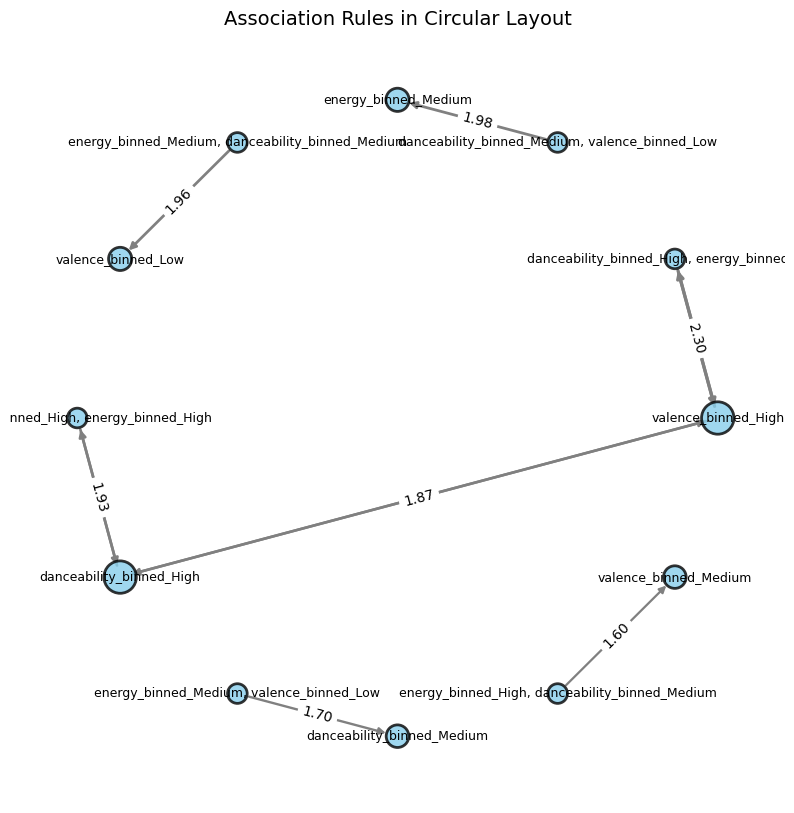

In [40]:

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create the graph
G = nx.DiGraph()

# Filter for top 10 rules for simplicity
top_rules = rules.sort_values(by='lift', ascending=False).head(10)

# Add edges and nodes from the top association rules
for i, rule in top_rules.iterrows():
    G.add_edge(', '.join(list(rule['antecedents'])),
               ', '.join(list(rule['consequents'])),
               weight=rule['lift'], support=rule['support'], confidence=rule['confidence'])

# Generate a circular layout for the graph
pos = nx.circular_layout(G)

# Calculate node sizes based on 'support'
# FIX: Create a dictionary mapping nodes to their support values
node_support_dict = {}
for _, rule in top_rules.iterrows():
    for item in rule['antecedents']:
        node_support_dict[item] = rule['support']  # or any relevant metric
    for item in rule['consequents']:
        node_support_dict[item] = rule['support']  # or any relevant metric

# Get node sizes based on support from the dictionary, default to a minimum size if not found
node_sizes = [node_support_dict.get(node, 0.1) * 2000 for node in G.nodes()]


# Draw the nodes (with proportional sizes)
plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=node_sizes, alpha=0.8, linewidths=2, edgecolors="black")

# Draw the edges (with edge widths based on 'lift')
edges = nx.draw_networkx_edges(G, pos, edge_color='gray', width=[d['weight'] for (u, v, d) in G.edges(data=True)], arrows=True)

# Add labels for nodes
nx.draw_networkx_labels(G, pos, font_size=9, font_color='black')

# Add edge labels for lift values
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Remove axes for clarity
plt.title("Association Rules in Circular Layout", fontsize=14)
plt.axis('off')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


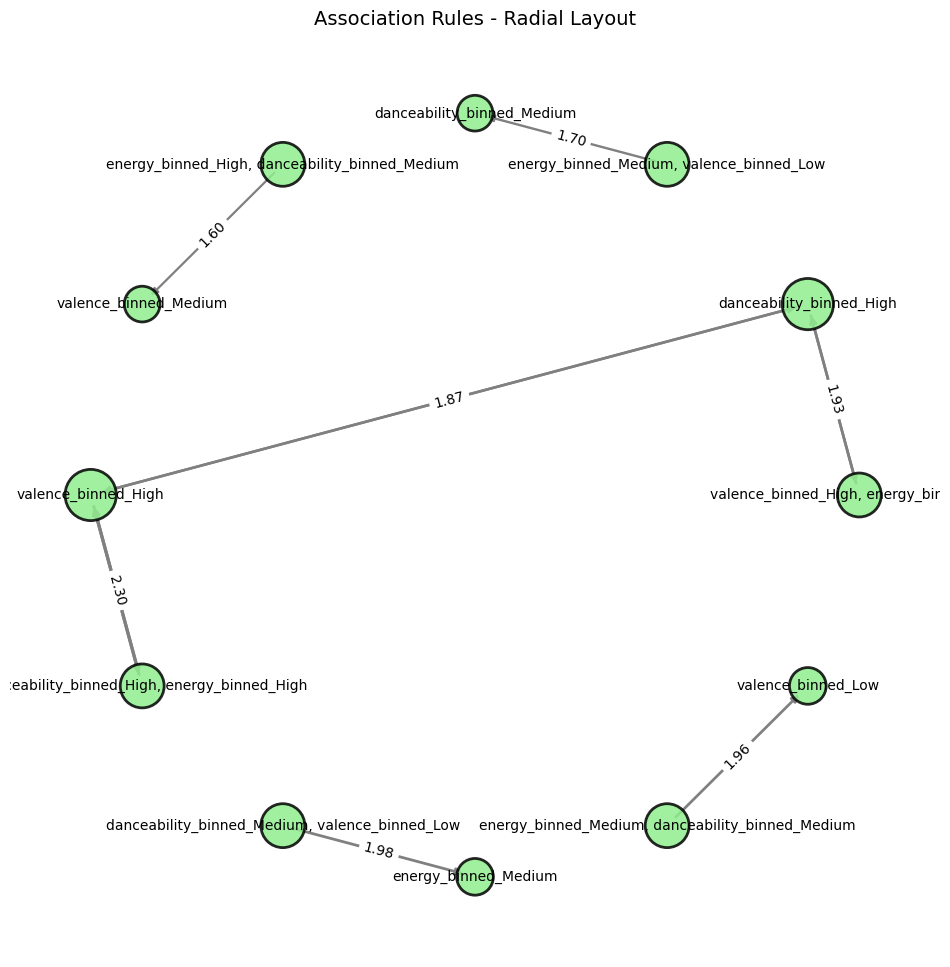

In [16]:
'''
#Extra graph for figuring out which is nicer
# Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create the graph
G = nx.DiGraph()

# Add edges and nodes from the top association rules (filter top 10 for simplicity)
top_rules = rules.sort_values(by='lift', ascending=False).head(10)
for i, rule in top_rules.iterrows():
    G.add_edge(', '.join(list(rule['antecedents'])),
               ', '.join(list(rule['consequents'])),
               weight=rule['lift'], support=rule['support'], confidence=rule['confidence'])

# Set up a circular (radial) layout for the nodes
pos = nx.shell_layout(G)

# Calculate node sizes based on support (scaled for visualization)
# FIX: Create a dictionary to store node sizes based on support
node_sizes_dict = {}
for _, rule in top_rules.iterrows():
    for item in rule['antecedents']:
        node_sizes_dict[item] = rule['support'] * 5000  # Or any relevant metric
    for item in rule['consequents']:
        node_sizes_dict[item] = rule['support'] * 5000  # Or any relevant metric

# Get node sizes in the correct order for drawing
node_sizes = [node_sizes_dict.get(node, 1000) for node in G.nodes()] # Default size if not in top_rules


# Draw the nodes with a white outline, larger and more proportional sizes
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_color='lightgreen', node_size=node_sizes, alpha=0.85, linewidths=2, edgecolors="black")

# Draw edges (set width based on 'lift')
edges = nx.draw_networkx_edges(G, pos, edge_color='gray', width=[d['weight'] for (u, v, d) in G.edges(data=True)], arrows=True)

# Add labels for nodes (inside the circle)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

# Add edge labels for lift values
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Add a title and remove axes
plt.title("Association Rules - Radial Layout", fontsize=14)
plt.axis('off')
plt.show()


'''